In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Train-test split
from sklearn.model_selection import train_test_split

# Model (you can replace with ExtraTreesRegressor or CatBoost)
from sklearn.ensemble import ExtraTreesRegressor

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score








In [5]:

df = pd.read_csv(r"/content/power_grid_data_100k.csv")

In [6]:
df.shape

(100000, 25)

In [7]:
df.head()

,project_type,region,soil_type,terrain_type,state,project_name,start_date,planned_duration_months,voltage_kv,circuit_type,...,fuel_price_index,inflation_rate,steel_tonnes,conductor_km,insulators_unit,concrete_cubic_meter,Bus_reactor,Transformers,circuit_breaker,JCB
0,Transmission Line,South,Rocky,Plains,Karnataka,Karnataka Power Corridor,2000-01-06,11,132,Single Circuit,...,130.87,7.97,5876.14,215.36,5583,3384.00,0,0,0,3
1,Upgradation,North,Mixed,Plains,Punjab,Nagpur - Sambalpur Upgradation,2025-07-06,34,765,Double Circuit,...,152.10,7.55,0.00,0.00,0,0.00,1,12,4,2
2,Substation,North,Mixed,Plains,Haryana,Kolhapur - Bongaigaon Substation,2005-02-14,17,400,Double Circuit,...,191.77,5.27,0.00,0.00,0,3119.23,3,9,23,5
3,Transmission Line,North,Sandy,Forest,Ladakh,Ladakh Indo Expansion,2022-05-14,30,400,Single Circuit,...,127.09,3.28,9556.49,309.12,10140,3346.20,0,0,0,6
4,Transmission Line,West,Sandy,Plains,Maharashtra,Maharashtra Rural Expansion,2003-06-07,18,132,Double Circuit,...,142.06,5.58,2081.88,143.73,4356,1980.00,0,0,0,5


In [8]:
df = df.drop(columns=['JCB'])

In [9]:
df.shape

(100000, 24)

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   project_type             100000 non-null  object 
 1   region                   100000 non-null  object 
 2   soil_type                100000 non-null  object 
 3   terrain_type             100000 non-null  object 
 4   state                    100000 non-null  object 
 5   project_name             100000 non-null  object 
 6   start_date               100000 non-null  object 
 7   planned_duration_months  100000 non-null  int64  
 8   voltage_kv               100000 non-null  int64  
 9   circuit_type             100000 non-null  object 
 10  conductor_type           100000 non-null  object 
 11  Length_km                100000 non-null  float64
 12  num_towers               100000 non-null  int64  
 13  steel_price_index        100000 non-null  float64
 14  condu

In [11]:
df.describe()

,planned_duration_months,voltage_kv,Length_km,num_towers,steel_price_index,conductor_price_index,fuel_price_index,inflation_rate,steel_tonnes,conductor_km,insulators_unit,concrete_cubic_meter,Bus_reactor,Transformers,circuit_breaker
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,22.637100,377.012440,73.912955,295.361440,100.610188,95.787081,134.851130,5.510381,14652.979365,646.501943,2.498437e+04,6385.218148,0.400800,2.605850,8.424500
std,9.608165,221.565497,107.101491,435.067035,13.821017,8.649212,29.264652,1.482330,26105.754237,1289.858136,5.106683e+04,8239.125210,0.801265,3.865965,12.540536
min,6.000000,132.000000,0.000000,0.000000,80.000000,85.000000,70.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,15.000000,220.000000,0.000000,0.000000,89.880000,88.220000,114.590000,4.500000,0.000000,0.000000,0.000000e+00,1918.800000,0.000000,0.000000,0.000000
50%,21.000000,400.000000,41.310000,161.000000,99.990000,94.940000,134.780000,5.510000,5817.725000,225.625000,7.999000e+03,3958.775000,0.000000,0.000000,0.000000
75%,28.000000,400.000000,105.950000,420.000000,110.110000,101.700000,155.180000,6.520000,18597.165000,754.452500,2.871000e+04,7854.000000,0.000000,5.000000,16.000000
max,48.000000,800.000000,1200.000000,5929.000000,160.000000,137.070000,200.000000,10.000000,605138.400000,34856.060000,1.434375e+06,155547.000000,3.000000,12.000000,40.000000


In [12]:
df.duplicated().sum()

np.int64(0)

Univariate analysis

Value Counts:
project_type
Transmission Line    59995
Substation           25118
HVDC                 10016
Upgradation           4871
Name: count, dtype: int64

Percentage:
project_type
Transmission Line    59.995
Substation           25.118
HVDC                 10.016
Upgradation           4.871
Name: proportion, dtype: float64


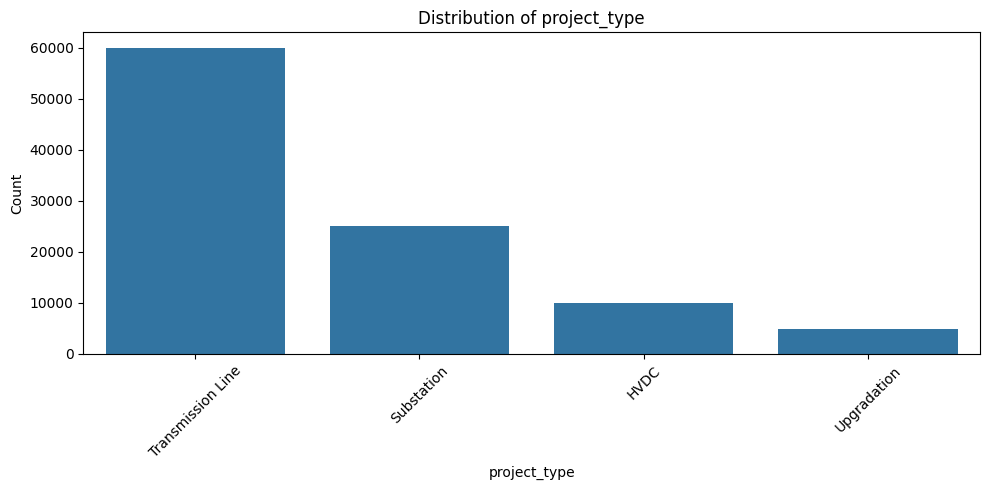

In [13]:
print("Value Counts:")
print(df['project_type'].value_counts())
print("\nPercentage:")
print(df['project_type'].value_counts(normalize=True) * 100)

# 2. Bar Plot (BEST for categorical)
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='project_type', order=df['project_type'].value_counts().index)
plt.xticks(rotation=45)
plt.title(f"Distribution of {'project_type'}")
plt.xlabel('project_type')
plt.ylabel("Count")
plt.tight_layout()
plt.show()

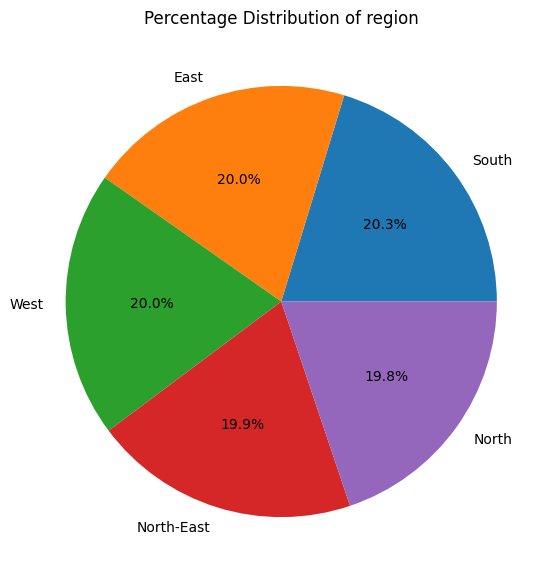

In [14]:
plt.figure(figsize=(7,7))
df['region'].value_counts().plot.pie(autopct='%1.1f%%', shadow=False)
plt.title(f"Percentage Distribution of {'region'}")
plt.ylabel("")  # hides the side label
plt.show()

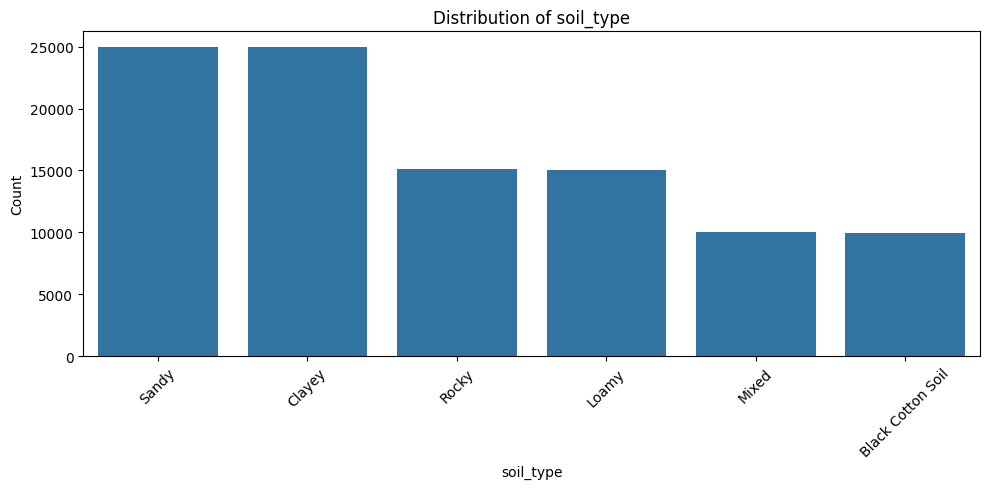

In [15]:
# 2. Bar Plot (BEST for categorical)
column = 'soil_type'

plt.figure(figsize=(10,5))
sns.countplot(data=df, x=column, order=df[column].value_counts().index)
plt.xticks(rotation=45)
plt.title(f"Distribution of {column}")
plt.xlabel(column)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

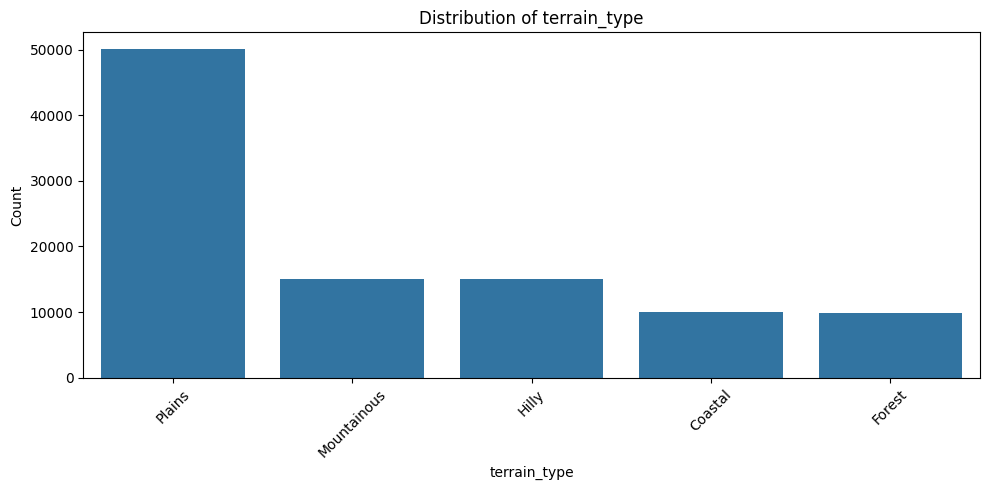

In [16]:
# 2. Bar Plot (BEST for categorical)
column = 'terrain_type'

plt.figure(figsize=(10,5))
sns.countplot(data=df, x=column, order=df[column].value_counts().index)
plt.xticks(rotation=45)
plt.title(f"Distribution of {column}")
plt.xlabel(column)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

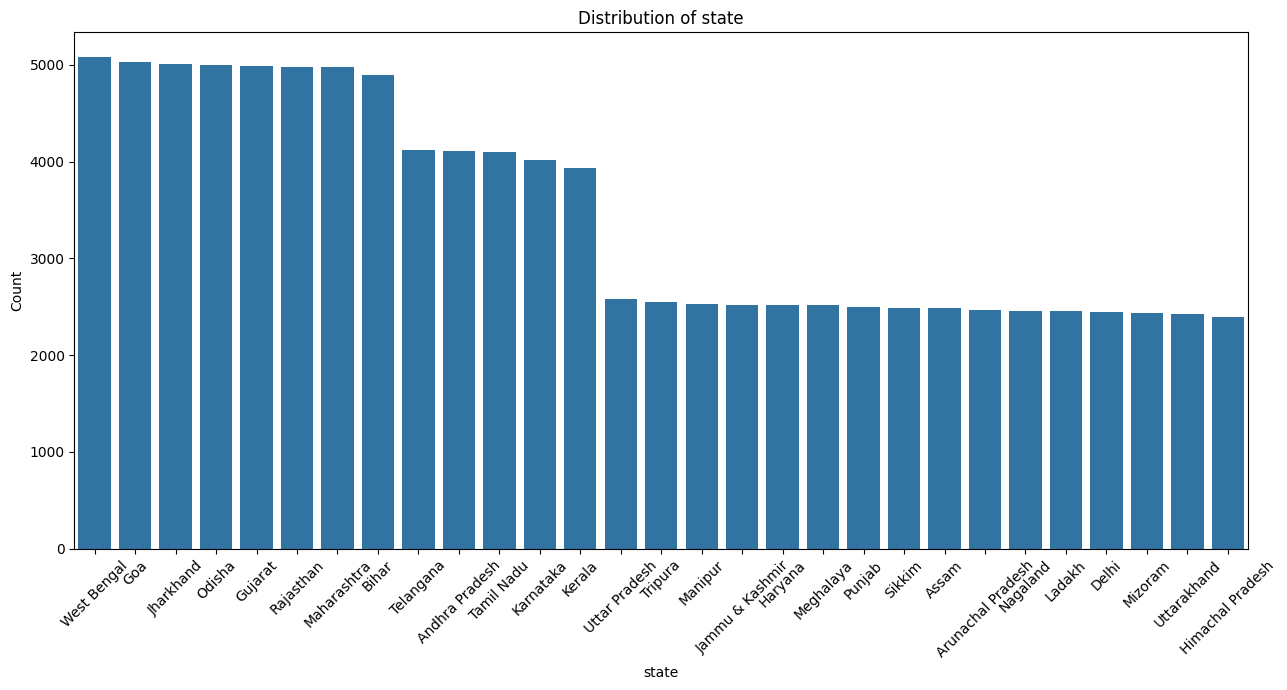

In [17]:
# 2. Bar Plot (BEST for categorical)
column = 'state'

plt.figure(figsize=(13,7))
sns.countplot(data=df, x=column, order=df[column].value_counts().index)
plt.xticks(rotation=45)
plt.title(f"Distribution of {column}")
plt.xlabel(column)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Dropping the state , project_name , start_date columns as those are not usefull to Machine learning

In [18]:
df = df.drop(columns=['state','project_name','start_date'])


In [19]:
target_cols = ['steel_tonnes',	'conductor_km',	'insulators_unit' ,	'concrete_cubic_meter','Bus_reactor','Transformers','circuit_breaker'
]

for col in target_cols:
    corr = df['planned_duration_months'].corr(df[col])
    print(f"Correlation with {col}: {corr}")

Correlation with steel_tonnes: -0.08465358168481366
Correlation with conductor_km: -0.07497041915569568
Correlation with insulators_unit: -0.07304608531294814
Correlation with concrete_cubic_meter: -0.11948434672797399
Correlation with Bus_reactor: 0.11938782573453201
Correlation with Transformers: 0.15914280462634042
Correlation with circuit_breaker: 0.1505784793519313


As We can see there is very weak relationship between the planned_duration_months and output features
- so we should drop the feature

In [20]:
df = df.drop(columns=['planned_duration_months'])

In [21]:
df.shape

(100000, 20)

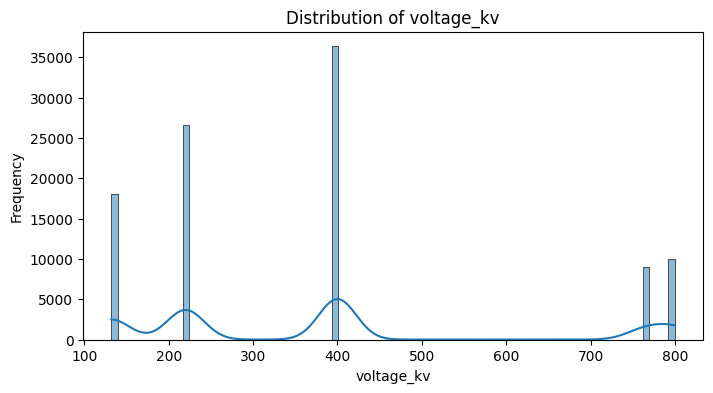

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(df['voltage_kv'], kde=True)
plt.title(f"Distribution of voltage_kv")
plt.xlabel('voltage_kv')
plt.ylabel("Frequency")
plt.show()

Mutlivariate analysis

In [23]:
target_cols = ['steel_tonnes',	'conductor_km',	'insulators_unit' ,	'concrete_cubic_meter','Bus_reactor','Transformers','circuit_breaker'
]

for col in target_cols:
    corr = df['Length_km'].corr(df[col])
    print(f"Correlation with {col}: {corr}")

Correlation with steel_tonnes: 0.8189718723474554
Correlation with conductor_km: 0.7282328537751004
Correlation with insulators_unit: 0.7116268296753316
Correlation with concrete_cubic_meter: 0.9302578294590063
Correlation with Bus_reactor: -0.3452080147991641
Correlation with Transformers: -0.4651798435084288
Correlation with circuit_breaker: -0.4636149304732262


In [24]:
target_cols = ['steel_tonnes',	'conductor_km',	'insulators_unit' ,	'concrete_cubic_meter','Bus_reactor','Transformers','circuit_breaker'
]

for col in target_cols:
    corr = df['num_towers'].corr(df[col])
    print(f"Correlation with {col}: {corr}")

Correlation with steel_tonnes: 0.8309217124837855
Correlation with conductor_km: 0.7171214825170183
Correlation with insulators_unit: 0.7223415184192086
Correlation with concrete_cubic_meter: 0.9453489442944116
Correlation with Bus_reactor: -0.33958886437585284
Correlation with Transformers: -0.4576078422729222
Correlation with circuit_breaker: -0.45606840223187795


In [25]:
target_cols = ['steel_tonnes',	'conductor_km',	'insulators_unit' ,	'concrete_cubic_meter','Bus_reactor','Transformers','circuit_breaker'
]

for col in target_cols:
    corr = df['steel_price_index'].corr(df[col])
    print(f"Correlation with {col}: {corr}")

Correlation with steel_tonnes: -0.003352931151689483
Correlation with conductor_km: -0.0035046472106870295
Correlation with insulators_unit: -0.003087875438019849
Correlation with concrete_cubic_meter: -0.0017405852986089282
Correlation with Bus_reactor: -0.0014549987851632353
Correlation with Transformers: 0.0024827738979750847
Correlation with circuit_breaker: 0.007809293441088339


In [26]:

target_cols = ['steel_tonnes',	'conductor_km',	'insulators_unit' ,	'concrete_cubic_meter','Bus_reactor','Transformers','circuit_breaker'
]

for col in target_cols:
    corr = df['conductor_price_index'].corr(df[col])
    print(f"Correlation with {col}: {corr}")

Correlation with steel_tonnes: -0.004300861134124635
Correlation with conductor_km: -0.005512831608379099
Correlation with insulators_unit: -0.00544972406029611
Correlation with concrete_cubic_meter: -0.0028066351164280382
Correlation with Bus_reactor: 0.0022369687090654858
Correlation with Transformers: 0.0029127238856707237
Correlation with circuit_breaker: 0.0013715388382257727


In [27]:

target_cols = ['steel_tonnes',	'conductor_km',	'insulators_unit' ,	'concrete_cubic_meter','Bus_reactor','Transformers','circuit_breaker'
]

for col in target_cols:
    corr = df['fuel_price_index'].corr(df[col])
    print(f"Correlation with {col}: {corr}")

Correlation with steel_tonnes: 0.002241301351945932
Correlation with conductor_km: 0.0018132134659760166
Correlation with insulators_unit: 0.0015140321201376128
Correlation with concrete_cubic_meter: 0.0017447065489992139
Correlation with Bus_reactor: -0.0018334300979284538
Correlation with Transformers: -0.001309753186408559
Correlation with circuit_breaker: -0.0025794526407847025


In [28]:


target_cols = ['steel_tonnes',	'conductor_km',	'insulators_unit' ,	'concrete_cubic_meter','Bus_reactor','Transformers','circuit_breaker'
]

for col in target_cols:
    corr = df['inflation_rate'].corr(df[col])
    print(f"Correlation with {col}: {corr}")

Correlation with steel_tonnes: 0.0027486543453213853
Correlation with conductor_km: 0.0009374714247044014
Correlation with insulators_unit: 0.0008763504135150241
Correlation with concrete_cubic_meter: -0.00033919328677977474
Correlation with Bus_reactor: 0.003206151261218748
Correlation with Transformers: 0.0005563012331192033
Correlation with circuit_breaker: 0.0006768989003340496


so I checked correlation between the some input features and output featues, as I had doubt on it
- so I have understood that these input feature has no-correlation with the output feature, so it is best to drop it.


In [29]:
df = df.drop(columns=['inflation_rate','steel_price_index','conductor_price_index','fuel_price_index'])

In [30]:
df.shape

(100000, 16)

In [31]:
df.head()

,project_type,region,soil_type,terrain_type,voltage_kv,circuit_type,conductor_type,Length_km,num_towers,steel_tonnes,conductor_km,insulators_unit,concrete_cubic_meter,Bus_reactor,Transformers,circuit_breaker
0,Transmission Line,South,Rocky,Plains,132,Single Circuit,ACSR Panther,71.79,282,5876.14,215.36,5583,3384.00,0,0,0
1,Upgradation,North,Mixed,Plains,765,Double Circuit,ACSR Zebra,0.00,0,0.00,0.00,0,0.00,1,12,4
2,Substation,North,Mixed,Plains,400,Double Circuit,ACSR Zebra,0.00,0,0.00,0.00,0,3119.23,3,9,23
3,Transmission Line,North,Sandy,Forest,400,Single Circuit,ACSR Zebra,51.52,169,9556.49,309.12,10140,3346.20,0,0,0
4,Transmission Line,West,Sandy,Plains,132,Double Circuit,ACSR Zebra,23.95,110,2081.88,143.73,4356,1980.00,0,0,0


In [32]:
df.to_csv("without_OHE_preprocessed_data_power_grid_100k.csv", index=False)

<h2>Preprocessing </h2>

In [33]:
#Missing value
df.isnull().sum().sum()

np.int64(0)

In [34]:
#Handling the categorical
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

OHE_project_type = OneHotEncoder(sparse_output=False)

encoded = OHE_project_type.fit_transform(df[['project_type']])
encoded_df = pd.DataFrame(encoded, columns=OHE_project_type.get_feature_names_out(['project_type']))

df = pd.concat([df.drop(columns=['project_type']), encoded_df], axis=1)



In [35]:
import joblib
joblib.dump(OHE_project_type, "OHE_project_type.pkl")

['OHE_project_type.pkl']

In [36]:
df.head()

,region,soil_type,terrain_type,voltage_kv,circuit_type,conductor_type,Length_km,num_towers,steel_tonnes,conductor_km,insulators_unit,concrete_cubic_meter,Bus_reactor,Transformers,circuit_breaker,project_type_HVDC,project_type_Substation,project_type_Transmission Line,project_type_Upgradation
0,South,Rocky,Plains,132,Single Circuit,ACSR Panther,71.79,282,5876.14,215.36,5583,3384.00,0,0,0,0.0,0.0,1.0,0.0
1,North,Mixed,Plains,765,Double Circuit,ACSR Zebra,0.00,0,0.00,0.00,0,0.00,1,12,4,0.0,0.0,0.0,1.0
2,North,Mixed,Plains,400,Double Circuit,ACSR Zebra,0.00,0,0.00,0.00,0,3119.23,3,9,23,0.0,1.0,0.0,0.0
3,North,Sandy,Forest,400,Single Circuit,ACSR Zebra,51.52,169,9556.49,309.12,10140,3346.20,0,0,0,0.0,0.0,1.0,0.0
4,West,Sandy,Plains,132,Double Circuit,ACSR Zebra,23.95,110,2081.88,143.73,4356,1980.00,0,0,0,0.0,0.0,1.0,0.0


In [37]:

# Select column
region_col = df[['region']]

# OHE encoder
OHE_region = OneHotEncoder(sparse_output=False, drop=None)

region_encoded = OHE_region.fit_transform(region_col)

# Convert to DataFrame
region_df = pd.DataFrame(region_encoded, columns=OHE_region.get_feature_names_out(['region']))

# Add back and drop original
df = pd.concat([df.drop(columns=['region']), region_df], axis=1)

df.head()

,soil_type,terrain_type,voltage_kv,circuit_type,conductor_type,Length_km,num_towers,steel_tonnes,conductor_km,insulators_unit,...,circuit_breaker,project_type_HVDC,project_type_Substation,project_type_Transmission Line,project_type_Upgradation,region_East,region_North,region_North-East,region_South,region_West
0,Rocky,Plains,132,Single Circuit,ACSR Panther,71.79,282,5876.14,215.36,5583,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Mixed,Plains,765,Double Circuit,ACSR Zebra,0.00,0,0.00,0.00,0,...,4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,Mixed,Plains,400,Double Circuit,ACSR Zebra,0.00,0,0.00,0.00,0,...,23,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Sandy,Forest,400,Single Circuit,ACSR Zebra,51.52,169,9556.49,309.12,10140,...,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Sandy,Plains,132,Double Circuit,ACSR Zebra,23.95,110,2081.88,143.73,4356,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
joblib.dump(OHE_region , "OHE_region.pkl")

['OHE_region.pkl']

In [39]:

# Select column
soil_col = df[['soil_type']]

# OHE encoder
OHE_soil = OneHotEncoder(sparse_output=False, drop=None)

soil_encoded = OHE_soil.fit_transform(soil_col)

# Convert to DataFrame
soil_df = pd.DataFrame(soil_encoded, columns=OHE_soil.get_feature_names_out(['soil_type']))

# Add back and drop original
df = pd.concat([df.drop(columns=['soil_type']), soil_df], axis=1)

df.head()

,terrain_type,voltage_kv,circuit_type,conductor_type,Length_km,num_towers,steel_tonnes,conductor_km,insulators_unit,concrete_cubic_meter,...,region_North,region_North-East,region_South,region_West,soil_type_Black Cotton Soil,soil_type_Clayey,soil_type_Loamy,soil_type_Mixed,soil_type_Rocky,soil_type_Sandy
0,Plains,132,Single Circuit,ACSR Panther,71.79,282,5876.14,215.36,5583,3384.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Plains,765,Double Circuit,ACSR Zebra,0.00,0,0.00,0.00,0,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Plains,400,Double Circuit,ACSR Zebra,0.00,0,0.00,0.00,0,3119.23,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Forest,400,Single Circuit,ACSR Zebra,51.52,169,9556.49,309.12,10140,3346.20,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Plains,132,Double Circuit,ACSR Zebra,23.95,110,2081.88,143.73,4356,1980.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
joblib.dump(OHE_soil , "OHE_soil.pkl")

['OHE_soil.pkl']

In [41]:
df.columns


Index(['terrain_type', 'voltage_kv', 'circuit_type', 'conductor_type',
       'Length_km', 'num_towers', 'steel_tonnes', 'conductor_km',
       'insulators_unit', 'concrete_cubic_meter', 'Bus_reactor',
       'Transformers', 'circuit_breaker', 'project_type_HVDC',
       'project_type_Substation', 'project_type_Transmission Line',
       'project_type_Upgradation', 'region_East', 'region_North',
       'region_North-East', 'region_South', 'region_West',
       'soil_type_Black Cotton Soil', 'soil_type_Clayey', 'soil_type_Loamy',
       'soil_type_Mixed', 'soil_type_Rocky', 'soil_type_Sandy'],
      dtype='object')

In [42]:
# Select column
terrain_col = df[['terrain_type']]

# OHE encoder
OHE_terrain = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')

terrain_encoded = OHE_terrain.fit_transform(terrain_col)

# Convert to DataFrame
terrain_df = pd.DataFrame(terrain_encoded, columns=OHE_terrain.get_feature_names_out(['terrain_type']))

# Add back and drop original
df = pd.concat([df.drop(columns=['terrain_type']), terrain_df], axis=1)

df.head()

,voltage_kv,circuit_type,conductor_type,Length_km,num_towers,steel_tonnes,conductor_km,insulators_unit,concrete_cubic_meter,Bus_reactor,...,soil_type_Clayey,soil_type_Loamy,soil_type_Mixed,soil_type_Rocky,soil_type_Sandy,terrain_type_Coastal,terrain_type_Forest,terrain_type_Hilly,terrain_type_Mountainous,terrain_type_Plains
0,132,Single Circuit,ACSR Panther,71.79,282,5876.14,215.36,5583,3384.00,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,765,Double Circuit,ACSR Zebra,0.00,0,0.00,0.00,0,0.00,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,400,Double Circuit,ACSR Zebra,0.00,0,0.00,0.00,0,3119.23,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,400,Single Circuit,ACSR Zebra,51.52,169,9556.49,309.12,10140,3346.20,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,132,Double Circuit,ACSR Zebra,23.95,110,2081.88,143.73,4356,1980.00,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [43]:
type(OHE_terrain)

sklearn.preprocessing._encoders.OneHotEncoder

In [44]:
joblib.dump(OHE_terrain,"terrain_encoded.pkl")

['terrain_encoded.pkl']

In [45]:
# Select column
circuit_col = df[['circuit_type']]

# OHE encoder
OHE_circuit = OneHotEncoder(sparse_output=False, drop=None)

# Fit + transform
circuit_encoded = OHE_circuit.fit_transform(circuit_col)

# Convert to DataFrame
circuit_df = pd.DataFrame(
    circuit_encoded,
    columns=OHE_circuit.get_feature_names_out(['circuit_type'])
)

# Add back and drop original
df = pd.concat([df.drop(columns=['circuit_type']), circuit_df], axis=1)

df.head()

,voltage_kv,conductor_type,Length_km,num_towers,steel_tonnes,conductor_km,insulators_unit,concrete_cubic_meter,Bus_reactor,Transformers,...,soil_type_Rocky,soil_type_Sandy,terrain_type_Coastal,terrain_type_Forest,terrain_type_Hilly,terrain_type_Mountainous,terrain_type_Plains,circuit_type_Double Circuit,circuit_type_Multi Circuit,circuit_type_Single Circuit
0,132,ACSR Panther,71.79,282,5876.14,215.36,5583,3384.00,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,765,ACSR Zebra,0.00,0,0.00,0.00,0,0.00,1,12,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,400,ACSR Zebra,0.00,0,0.00,0.00,0,3119.23,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,400,ACSR Zebra,51.52,169,9556.49,309.12,10140,3346.20,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,132,ACSR Zebra,23.95,110,2081.88,143.73,4356,1980.00,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [46]:
joblib.dump(OHE_circuit,"OHE_circuit.pkl")

['OHE_circuit.pkl']

In [47]:
# Select column
conductor_col = df[['conductor_type']]

# OHE encoder
OHE_conductor = OneHotEncoder(sparse_output=False, drop=None)

# Fit + transform
conductor_encoded = OHE_conductor.fit_transform(conductor_col)

# Convert to DataFrame
conductor_df = pd.DataFrame(
    conductor_encoded,
    columns=OHE_conductor.get_feature_names_out(['conductor_type'])
)

# Add back and drop original
df = pd.concat([df.drop(columns=['conductor_type']), conductor_df], axis=1)

df.head()


,voltage_kv,Length_km,num_towers,steel_tonnes,conductor_km,insulators_unit,concrete_cubic_meter,Bus_reactor,Transformers,circuit_breaker,...,terrain_type_Hilly,terrain_type_Mountainous,terrain_type_Plains,circuit_type_Double Circuit,circuit_type_Multi Circuit,circuit_type_Single Circuit,conductor_type_AAAC Moose,conductor_type_ACSR Panther,conductor_type_ACSR Zebra,conductor_type_HTLS
0,132,71.79,282,5876.14,215.36,5583,3384.00,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,765,0.00,0,0.00,0.00,0,0.00,1,12,4,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,400,0.00,0,0.00,0.00,0,3119.23,3,9,23,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,400,51.52,169,9556.49,309.12,10140,3346.20,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,132,23.95,110,2081.88,143.73,4356,1980.00,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
joblib.dump(OHE_conductor,'OHE_conductor.pkl')

['OHE_conductor.pkl']

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   voltage_kv                      100000 non-null  int64  
 1   Length_km                       100000 non-null  float64
 2   num_towers                      100000 non-null  int64  
 3   steel_tonnes                    100000 non-null  float64
 4   conductor_km                    100000 non-null  float64
 5   insulators_unit                 100000 non-null  int64  
 6   concrete_cubic_meter            100000 non-null  float64
 7   Bus_reactor                     100000 non-null  int64  
 8   Transformers                    100000 non-null  int64  
 9   circuit_breaker                 100000 non-null  int64  
 10  project_type_HVDC               100000 non-null  float64
 11  project_type_Substation         100000 non-null  float64
 12  project_type_Tran



================= voltage_kv =================
Skewness: 0.8452
Shapiro Test --> Stat: 0.8119, p-value: 0.0000
=> Data is NOT normal (reject H0)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


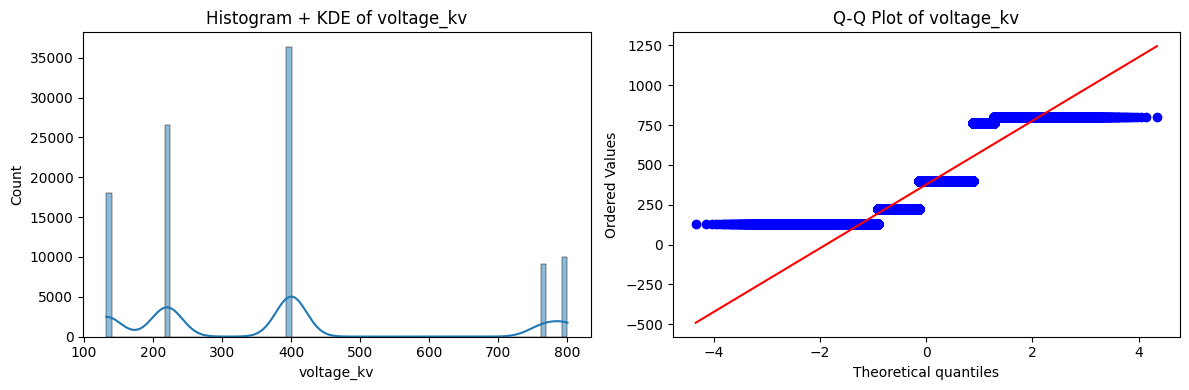



================= Length_km =================
Skewness: 3.0755
Shapiro Test --> Stat: 0.6938, p-value: 0.0000
=> Data is NOT normal (reject H0)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


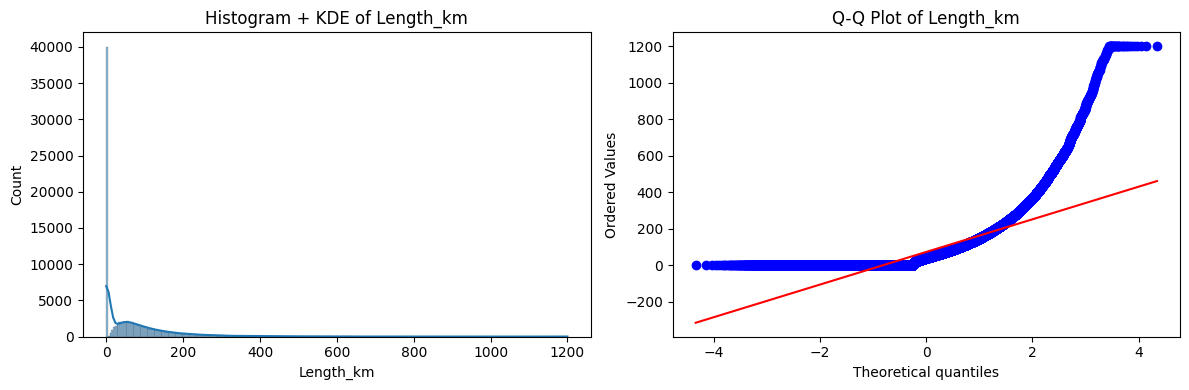



================= num_towers =================
Skewness: 3.2336
Shapiro Test --> Stat: 0.6836, p-value: 0.0000
=> Data is NOT normal (reject H0)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


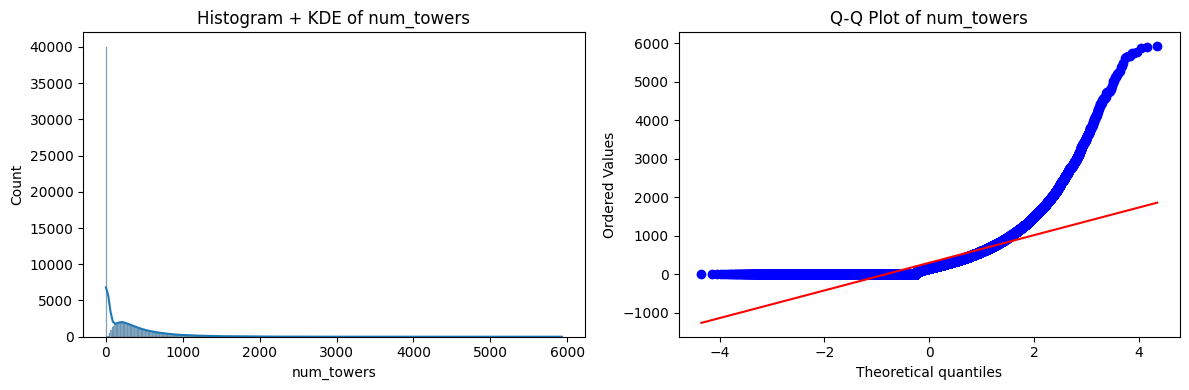

In [50]:
from scipy.stats import shapiro, probplot

# Columns to analyze
cols = ["voltage_kv", "Length_km", "num_towers"]

for col in cols:
    print(f"\n\n================= {col} =================")

    # 1. Skewness
    skew_val = df[col].skew()
    print(f"Skewness: {skew_val:.4f}")

    # 2. Shapiro-Wilk Test (normality test)
    stat, p = shapiro(df[col].dropna())
    print(f"Shapiro Test --> Stat: {stat:.4f}, p-value: {p:.4f}")
    if p > 0.05:
        print("=> Data seems normally distributed (fail to reject H0)")
    else:
        print("=> Data is NOT normal (reject H0)")

    # 3. Plot histogram + KDE
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram + KDE of {col}")

    # 4. Q-Q plot
    plt.subplot(1,2,2)
    probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col}")

    plt.tight_layout()
    plt.show()

In [51]:
cols = ["voltage_kv", "Length_km", "num_towers"]

# Percentile thresholds (you can adjust 1–99 or 2–98)
lower_p = 1
upper_p = 99

print("Outlier removal summary:\n")

for col in cols:
    # Calculate thresholds
    lower_bound = np.percentile(df[col], lower_p)
    upper_bound = np.percentile(df[col], upper_p)

    print(f"{col}:")
    print(f"  Lower {lower_p}th percentile = {lower_bound}")
    print(f"  Upper {upper_p}th percentile = {upper_bound}")

    # Filter the dataframe
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    print(f"  Remaining rows after removing outliers: {len(df)}\n")

# Final shape
print("\nFinal DataFrame shape:", df.shape)

Outlier removal summary:

voltage_kv:
  Lower 1th percentile = 132.0
  Upper 99th percentile = 800.0
  Remaining rows after removing outliers: 100000

Length_km:
  Lower 1th percentile = 0.0
  Upper 99th percentile = 495.3805999999997
  Remaining rows after removing outliers: 99000

num_towers:
  Lower 1th percentile = 0.0
  Upper 99th percentile = 1572.0
  Remaining rows after removing outliers: 98011


Final DataFrame shape: (98011, 37)


In [52]:
df.head()

,voltage_kv,Length_km,num_towers,steel_tonnes,conductor_km,insulators_unit,concrete_cubic_meter,Bus_reactor,Transformers,circuit_breaker,...,terrain_type_Hilly,terrain_type_Mountainous,terrain_type_Plains,circuit_type_Double Circuit,circuit_type_Multi Circuit,circuit_type_Single Circuit,conductor_type_AAAC Moose,conductor_type_ACSR Panther,conductor_type_ACSR Zebra,conductor_type_HTLS
0,132,71.79,282,5876.14,215.36,5583,3384.00,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,765,0.00,0,0.00,0.00,0,0.00,1,12,4,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,400,0.00,0,0.00,0.00,0,3119.23,3,9,23,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,400,51.52,169,9556.49,309.12,10140,3346.20,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,132,23.95,110,2081.88,143.73,4356,1980.00,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
df.to_csv("preprocessed_data_power_grid_100k.csv", index=False)

In [54]:
# Multiple output variables
target_columns = [
    "steel_tonnes",
    "conductor_km",
    "insulators_unit",
    "concrete_cubic_meter",
    "Bus_reactor",
    "Transformers",
    "circuit_breaker"
]

X = df.drop(columns=target_columns)
y = df[target_columns]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Train:", X_train.shape)
print("Test :", X_test.shape)

Train: (78408, 30)
Test : (19603, 30)


In [51]:
model_1 = ExtraTreesRegressor(
    n_estimators=650,        # more trees → reduces noise
    max_depth=None,          # allow full depth → prevents underfitting
    min_samples_split=2,
    min_samples_leaf=2,
     # use more features → reduces randomness
    bootstrap=False,         # ExtraTrees works best WITHOUT bootstrap
    n_jobs=-1,
    random_state=1
)
model_1.fit(X_train, y_train)

ExtraTreesRegressor(min_samples_leaf=2, n_estimators=650, n_jobs=-1,
                    random_state=1)

In [52]:
import joblib
joblib.dump(model_1, "extratree_model.pkl")


['extratree_model.pkl']

In [53]:
y_pred = model_1.predict(X_test)

In [54]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Overall Multi-Output Model Performance:")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

Overall Multi-Output Model Performance:
MAE : 249.41977883897835
MSE : 1084144.7578368026
RMSE: 1041.2227224935127
R²  : 0.7770804805905545


In [55]:
print("\nTarget-wise Performance:\n")

for i, col in enumerate(target_columns):
    mae_t = mean_absolute_error(y_test[col], y_pred[:, i])
    mse_t = mean_squared_error(y_test[col], y_pred[:, i])
    rmse_t = np.sqrt(mse_t)
    r2_t = r2_score(y_test[col], y_pred[:, i])

    print(f"{col}:")
    print(f"  MAE : {mae_t}")
    print(f"  RMSE: {rmse_t}")
    print(f"  R²  : {r2_t}")
    print("-" * 35)


Target-wise Performance:

steel_tonnes:
  MAE : 1110.6411611394253
  RMSE: 2558.968608071016
  R²  : 0.9834621428620253
-----------------------------------
conductor_km:
  MAE : 45.28096668048957
  RMSE: 118.33632753416046
  R²  : 0.9862601731842703
-----------------------------------
insulators_unit:
  MAE : 60.56599341928105
  RMSE: 190.49384225059237
  R²  : 0.9999765119214801
-----------------------------------
concrete_cubic_meter:
  MAE : 523.5126676605755
  RMSE: 995.1548832099244
  R²  : 0.972942629564961
-----------------------------------
Bus_reactor:
  MAE : 0.37042468594249034
  RMSE: 0.6987641302676697
  R²  : 0.2636940634819537
-----------------------------------
Transformers:
  MAE : 1.309873046137315
  RMSE: 2.412967058745747
  R²  : 0.6200509347008903
-----------------------------------
circuit_breaker:
  MAE : 4.257365241003628
  RMSE: 7.8756051915126974
  R²  : 0.6131769084183002
-----------------------------------


In [56]:
y_test

,steel_tonnes,conductor_km,insulators_unit,concrete_cubic_meter,Bus_reactor,Transformers,circuit_breaker
29454,0.00,0.00,0,4109.56,2,9,32
15271,0.00,0.00,0,4470.39,1,5,29
24651,18057.12,845.95,36720,6885.00,0,0,0
84833,12190.61,275.17,11820,4255.20,0,0,0
16757,0.00,0.00,0,0.00,0,1,16
...,...,...,...,...,...,...,...
59538,22518.80,1033.85,45240,4524.00,0,0,0
17619,8886.46,250.67,9405,4275.00,0,0,0
60746,0.00,0.00,0,0.00,3,4,12
12772,12502.31,457.06,13404,12186.00,0,0,0


In [57]:
y_pred[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.55022303e+03,
       1.14772894e+00, 4.55725275e+00, 2.24208425e+01])

In [58]:
sample_X = X_test.iloc[[10]]
sample_y_actual = y_test.iloc[[10]]

In [59]:
sample_y_pred = model_1.predict(sample_X)

In [60]:
import pandas as pd

sample_y_pred_df = pd.DataFrame(sample_y_pred, columns=y_test.columns)

In [61]:
comparison = pd.concat([sample_y_actual.reset_index(drop=True),
                        sample_y_pred_df], axis=1)

comparison.columns = [f"{col}_actual" for col in sample_y_actual.columns] + \
                     [f"{col}_pred" for col in sample_y_pred_df.columns]

comparison

,steel_tonnes_actual,conductor_km_actual,insulators_unit_actual,concrete_cubic_meter_actual,Bus_reactor_actual,Transformers_actual,circuit_breaker_actual,steel_tonnes_pred,conductor_km_pred,insulators_unit_pred,concrete_cubic_meter_pred,Bus_reactor_pred,Transformers_pred,circuit_breaker_pred
0,15176.53,341.27,16200,4050.0,0,0,0,16135.180946,367.890542,16258.255385,4324.523115,0.0,0.0,0.0


In [62]:
sample_y_pred_df

,steel_tonnes,conductor_km,insulators_unit,concrete_cubic_meter,Bus_reactor,Transformers,circuit_breaker
0,16135.180946,367.890542,16258.255385,4324.523115,0.0,0.0,0.0


In [63]:
sample_X = X_test.sample(5, random_state=42)
sample_y_actual = y_test.loc[sample_X.index]

sample_y_pred = model_1.predict(sample_X)
sample_y_pred_df = pd.DataFrame(sample_y_pred, columns=y_test.columns)

pd.concat([sample_y_actual.reset_index(drop=True),
           sample_y_pred_df], axis=1)

,steel_tonnes,conductor_km,insulators_unit,concrete_cubic_meter,Bus_reactor,Transformers,circuit_breaker,steel_tonnes,conductor_km,insulators_unit,concrete_cubic_meter,Bus_reactor,Transformers,circuit_breaker
0,25332.24,692.12,24618,13428.00,0,0,0,23633.373386,612.287108,24791.220385,13411.234692,0.000000,0.000000,0.000000
1,73449.07,3110.61,147480,33183.00,0,0,0,75400.487123,3364.694900,147484.030769,29613.821654,0.000000,0.000000,0.000000
2,11861.07,779.25,20988,10494.00,0,0,0,11017.519646,840.378623,21019.343590,10335.663500,0.000000,0.000000,0.000000
3,0.00,0.00,0,2473.74,0,12,34,0.000000,0.000000,0.000000,3663.371250,0.875000,6.875000,20.875000
4,0.00,0.00,0,0.00,2,4,19,0.000000,0.000000,0.000000,0.000000,0.784231,6.820128,21.183205


In [1]:
import pandas as pd
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# -----------------------------------------------------
# 1) CORRECTED RAW FEATURE SCHEMA
# -----------------------------------------------------

categorical_features = [
    "project_type",
    "region",
    "soil_type",
    "terrain_type",
    "circuit_type",
    "conductor_type"
]

numerical_features = [
    "voltage_kv",
    "Length_km",
    "num_towers"
]

# targets (NOT used in pipeline)
target_features = [
    "steel_tonnes",
    "conductor_km",
    "insulators_unit",
    "concrete_cubic_meter",
    "Bus_reactor",
    "Transformers",
    "circuit_breaker"
]




# -----------------------------------------------------
# 2) LOAD THE 6 OHE ENCODERS
# -----------------------------------------------------

ohe_project_type = joblib.load("/content/OHE_project_type.pkl")
ohe_region       = joblib.load("/content/OHE_region.pkl")
ohe_soil         = joblib.load("/content/OHE_soil.pkl")
ohe_terrain      = joblib.load("/content/terrain_encoded.pkl")
ohe_circuit      = joblib.load("/content/OHE_circuit.pkl")
ohe_conductor    = joblib.load("/content/OHE_conductor.pkl")

# -----------------------------------------------------
# 3) BUILD THE PREPROCESSOR
# -----------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("project_type_ohe", ohe_project_type, ["project_type"]),
        ("region_ohe",       ohe_region,       ["region"]),
        ("soil_ohe",         ohe_soil,         ["soil_type"]),
        ("terrain_ohe",      ohe_terrain,      ["terrain_type"]),
        ("circuit_ohe",      ohe_circuit,      ["circuit_type"]),
        ("conductor_ohe",    ohe_conductor,    ["conductor_type"]),
        ("numerical",        "passthrough",     numerical_features)
    ]
)



# -----------------------------------------------------
# 4) LOAD TRAINED MODEL
# -----------------------------------------------------
model = joblib.load("/content/extratree_model.pkl")

# -----------------------------------------------------
# 5) FINAL PIPELINE
# -----------------------------------------------------
full_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ]
)

# -----------------------------------------------------
# 6) SAVE PIPELINE
# -----------------------------------------------------
#joblib.dump(full_pipeline, "full_ml_pipeline.pkl")
print("Final pipeline saved as full_ml_pipeline.pkl")


Final pipeline saved as full_ml_pipeline.pkl


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import shutil

shutil.make_archive("full_ml_pipeline", 'zip', ".", "/content/full_ml_pipeline.pkl")

'/content/full_ml_pipeline.zip'

In [36]:
import shutil

# Source path: where your file currently is
source = '/content/full_ml_pipeline.pkl'

# Destination path: where you want it in Drive
destination = '/content/drive/MyDrive/full_ml_pipeline.pkl'

# Copy the file
shutil.copy(source, destination)

print("Pipeline uploaded to Drive successfully!")


Pipeline uploaded to Drive successfully!


In [2]:
import pandas as pd
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# -----------------------------------------------------
# 1) FEATURE SCHEMA
# -----------------------------------------------------
categorical_features = [
    "project_type",
    "region",
    "soil_type",
    "terrain_type",
    "circuit_type",
    "conductor_type"
]

numerical_features = [
    "voltage_kv",
    "Length_km",
    "num_towers"
]

target_features = [
    "steel_tonnes",
    "conductor_km",
    "insulators_unit",
    "concrete_cubic_meter",
    "Bus_reactor",
    "Transformers",
    "circuit_breaker"
]

# -----------------------------------------------------
# 2) LOAD DATASET
# -----------------------------------------------------
df = pd.read_csv("/content/without_OHE_preprocessed_data_power_grid_100k.csv")   # ⬅ change file path if needed

# -----------------------------------------------------
# 3) SPLIT INTO X (features) AND y (label)
# -----------------------------------------------------
X = df[categorical_features + numerical_features]
y = df[target_features]   # multi-output regression

# -----------------------------------------------------
# 4) TRAIN/TEST SPLIT
# -----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [3]:
# -----------------------------------------------------
import joblib
import pandas as pd
#pipeline = joblib.load("/content/drive/MyDrive/full_ml_pipeline.pkl")

test_data = pd.DataFrame([{
    "project_type": "Transmission Line",
    "region": "South",
    "soil_type": "Rocky",
    "terrain_type": "Plains",
    "voltage_kv": 132,
    "circuit_type": "Single Circuit",
    "conductor_type": "ACSR Panther",
    "Length_km": 71.79,
    "num_towers": 282
}])

# -----------------------------------------------------
# 3) MAKE PREDICTIONS
# -----------------------------------------------------
full_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('project_type_ohe',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['project_type']),
                                                 ('region_ohe',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['region']),
                                                 ('soil_ohe',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['soil_type']),
                                                 ('terrain_ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['terrain_type']),
                                                 ('circuit_ohe',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['circuit_type']),
                                                 ('conductor_ohe',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['conductor_type']),
                                                 ('numerical', 'passthrough',
                                                  ['voltage_kv', 'Length_km',
                                                   'num_towers'])])),
                ('model',
                 ExtraTreesRegressor(min_samples_leaf=2, n_estimators=650,
                                     n_jobs=-1, random_state=1))])

In [4]:
pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('project_type_ohe',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['project_type']),
                                                 ('region_ohe',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['region']),
                                                 ('soil_ohe',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['soil_type']),
                                                 ('terrain_ohe',
                                                  array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]]),
                                                  ['terrain_type']),
                                                 ('circuit_ohe',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['circuit_type']),
                                                 ('conductor_ohe',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['conductor_type']),
                                                 ('numerical', 'passthrough',
                                                  ['voltage_kv', 'Length_km',
                                                   'num_towers'])])),
                ('model',
                 ExtraTreesRegressor(min_samples_leaf=2, n_estimators=650,
                                     n_jobs=-1, random_state=1))])

In [4]:
print(type(ohe_project_type))
print(type(ohe_region))
print(type(ohe_soil))
print(type(ohe_terrain))
print(type(ohe_circuit))
print(type(ohe_conductor))

<class 'sklearn.preprocessing._encoders.OneHotEncoder'>
<class 'sklearn.preprocessing._encoders.OneHotEncoder'>
<class 'sklearn.preprocessing._encoders.OneHotEncoder'>
<class 'sklearn.preprocessing._encoders.OneHotEncoder'>
<class 'sklearn.preprocessing._encoders.OneHotEncoder'>
<class 'sklearn.preprocessing._encoders.OneHotEncoder'>


In [5]:
test_data = pd.DataFrame([{
    "project_type": "Transmission Line",
    "region": "South",
    "soil_type": "Rocky",
    "terrain_type": "Plains",
    "voltage_kv": 132,
    "circuit_type": "Single Circuit",
    "conductor_type": "ACSR Panther",
    "Length_km": 71.79,
    "num_towers": 282
}])

# -----------------------------------------------------
# 3) MAKE PREDICTIONS
# -----------------------------------------------------
full_pipeline.predict(test_data)

array([[5975.24884103,  215.42047436, 5564.15730769, 3375.52523077,
           0.        ,    0.        ,    0.        ]])

In [6]:
joblib.dump(full_pipeline, "full_ml_pipeline_1.pkl")

['full_ml_pipeline_1.pkl']

In [7]:
import shutil

# Source path: where your file currently is
source = '/content/full_ml_pipeline_1.pkl'

# Destination path: where you want it in Drive
destination = '/content/drive/MyDrive/full_ml_pipeline_1.pkl'

# Copy the file
shutil.copy(source, destination)

print("Pipeline uploaded to Drive successfully!")


Pipeline uploaded to Drive successfully!
